In [19]:
import json
import numpy as np
import os
import cv2 as cv
import matplotlib.pyplot as plt

FILE_PATH = r'../../data/raw/airplane/train/_annotations.coco.json'
TRAIN_PATH = r'../../data/raw/airplane/train'

In [3]:
with open(FILE_PATH, 'r') as f:
    data = json.load(f)
    

In [4]:
max_id = len(data['annotations'])
random_num = np.random.randint(0, max_id, 400)
sort_random_num = np.sort(random_num)
sort_random_num

array([   1,   18,   40,   45,   52,   64,   65,   74,   78,   78,   88,
         97,  112,  118,  142,  153,  172,  186,  202,  203,  209,  215,
        219,  237,  245,  274,  277,  296,  306,  310,  332,  356,  403,
        407,  412,  441,  449,  449,  455,  460,  475,  476,  494,  528,
        535,  541,  550,  552,  556,  564,  578,  616,  623,  650,  665,
        667,  670,  675,  696,  703,  719,  720,  721,  739,  740,  758,
        760,  785,  787,  794,  807,  816,  817,  823,  829,  844,  851,
        852,  863,  867,  877,  897,  908,  929,  944,  944,  968,  975,
        977,  978,  978, 1001, 1010, 1027, 1046, 1052, 1055, 1066, 1070,
       1096, 1139, 1165, 1175, 1179, 1184, 1187, 1190, 1201, 1209, 1214,
       1230, 1243, 1259, 1266, 1273, 1280, 1281, 1298, 1313, 1320, 1345,
       1365, 1367, 1389, 1403, 1405, 1412, 1413, 1437, 1443, 1496, 1504,
       1525, 1531, 1542, 1555, 1557, 1580, 1606, 1625, 1630, 1631, 1680,
       1684, 1684, 1698, 1730, 1759, 1772, 1783, 18

In [5]:
# example = []
# for id_img in sort_random_num:
#     example.append(data.get('annotations')[id_img])

# example[299]

In [6]:
# print(f"Số phần tử trong sort_random_num: {len(sort_random_num)}")
# print(f"Số phần tử trong annotations: {len(data.get('annotations', []))}")
# print(f"Số phần tử trong example: {len(example)}")
# # print(f"Giá trị lớn nhất trong sort_random_num: {max(sort_random_num) if sort_random_num else 'Rỗng'}")

In [7]:
a_ = data['images'][4092]
b_ = data.get('images')[4092]
type(b_)

dict

In [8]:
# object_id_anno = data.get('annotations')[79]['id']
# object_id_anno


79

In [ ]:
# img_id = data.get('annotations')[79]['image_id']
# img_id

71

In [ ]:
# file_name = os.path.join(TRAIN_PATH, data.get('images')[img_id]['file_name'])
# file_name

'../../data/raw/airplane/train\\00000831_jpg.rf.6621dcb5312b87e60a970a7a3d9f2ad2.jpg'

In [ ]:
# example = data.get('annotations')[79]
# example

{'id': 79,
 'image_id': 71,
 'category_id': 1,
 'bbox': [4, 101, 607, 396],
 'area': 240372,
 'segmentation': [],
 'iscrowd': 0}

In [ ]:
# x1 = data.get('annotations')[object_id_anno]['bbox'][0]
# x1

4

In [ ]:
# y1 = data.get('annotations')[object_id_anno]['bbox'][1]
# y1

101

In [ ]:
# x2 = data.get('annotations')[object_id_anno]['bbox'][2]
# x2

607

In [ ]:
# y2 = data.get('annotations')[object_id_anno]['bbox'][3]
# y2

396

In [16]:
# doc anh 
img = cv.imread(file_name)
img




array([[[5, 2, 0],
        [4, 2, 1],
        [1, 0, 7],
        ...,
        [9, 5, 0],
        [9, 5, 0],
        [9, 5, 0]],

       [[5, 2, 0],
        [4, 2, 1],
        [1, 0, 7],
        ...,
        [4, 0, 0],
        [5, 0, 0],
        [4, 0, 0]],

       [[5, 2, 0],
        [4, 2, 1],
        [1, 0, 7],
        ...,
        [4, 0, 8],
        [6, 0, 8],
        [4, 0, 8]],

       ...,

       [[5, 0, 0],
        [5, 0, 0],
        [5, 0, 0],
        ...,
        [6, 1, 0],
        [0, 0, 1],
        [0, 0, 3]],

       [[2, 1, 3],
        [2, 1, 3],
        [2, 1, 3],
        ...,
        [6, 1, 0],
        [0, 0, 1],
        [0, 0, 3]],

       [[0, 0, 3],
        [0, 0, 3],
        [0, 0, 3],
        ...,
        [6, 1, 0],
        [0, 0, 1],
        [0, 0, 3]]], dtype=uint8)

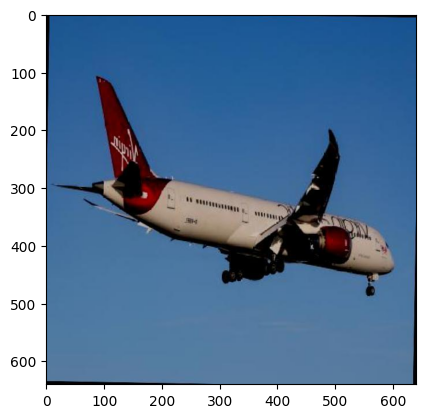

In [22]:
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(rgb_img)
plt.show()

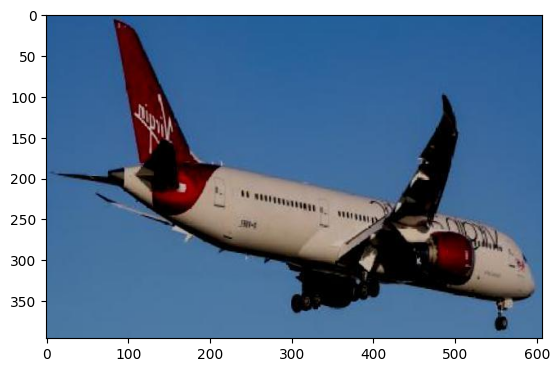

In [24]:
cropped_image = img[y1: y1+y2, x1: x1+x2]
rgb_cropped_image = cv.cvtColor(cropped_image, cv.COLOR_BGR2RGB)

plt.imshow(rgb_cropped_image)


In [27]:
save_path = '../../tests/train_data'
os.makedirs(save_path)

In [25]:
! git add .

fatal: pathspec '.gitignore' did not match any files


In [ ]:
output_file_name = f'ojb_{object_id_anno}_img_{img_id}.jpg'
output_path = os.path.join(save_path, output_file_name)


In [31]:
# save file anh
cv.imwrite(filename= output_path, img= cropped_image)

True

In [32]:
save_path = '../../data/interim/train/airplane'
os.makedirs(save_path)

In [51]:

for obj_id in sort_random_num:
    #  lay ra thong tin obj trong json
    object_id_anno = data.get('annotations')[obj_id]['id'] 
    img_id = data.get('annotations')[obj_id]['image_id']
    file_name = os.path.join(TRAIN_PATH, data.get('images')[img_id]['file_name'])
    example = data.get('annotations')[obj_id]
    
    # vi tri bbox
    x = data.get('annotations')[object_id_anno]['bbox'][0]
    y = data.get('annotations')[object_id_anno]['bbox'][1]
    w = data.get('annotations')[object_id_anno]['bbox'][2]
    h = data.get('annotations')[object_id_anno]['bbox'][3]

    # doc anh
    img = cv.imread(file_name)
    # cat anh
    cropped_image = img[y: y + h, x: x + w]
    # luu anh vao save_path
    output_file_name = f'ojb_{object_id_anno}_img_{img_id}.jpg'
    output_path = os.path.join(save_path, output_file_name)
    cv.imwrite(filename= output_path, img= cropped_image)
    
    


In [34]:
save_path_fighter = '../../data/interim/train/fighter'
os.makedirs(save_path_fighter)

In [ ]:
TRAIN_FIGHTER_PATH = r'../../data\raw\fight_10000_images\train'
FIGHTER_JSON_PATH = r'../../data\raw\fight_10000_images\train\_annotations.coco.json'
OUTPUT_TRAIN_FIGHTER_PATH = r'../../data\interim\train\fighter'


In [40]:
with open(FIGHTER_JSON_PATH, 'r') as f:
    fighter_json_data = json.load(f)

fighter_json_data

{'info': {'year': '2023',
  'version': '1',
  'description': 'Exported from roboflow.com',
  'contributor': '',
  'url': 'https://public.roboflow.com/object-detection/undefined',
  'date_created': '2023-09-24T14:10:07+00:00'},
 'licenses': [{'id': 1,
   'url': 'https://choosealicense.com/licenses/mit/',
   'name': 'MIT'}],
 'categories': [{'id': 0, 'name': 'fighter-jets', 'supercategory': 'none'},
  {'id': 1, 'name': 'A10', 'supercategory': 'fighter-jets'},
  {'id': 2, 'name': 'A400M', 'supercategory': 'fighter-jets'},
  {'id': 3, 'name': 'AG600', 'supercategory': 'fighter-jets'},
  {'id': 4, 'name': 'AV8B', 'supercategory': 'fighter-jets'},
  {'id': 5, 'name': 'B1', 'supercategory': 'fighter-jets'},
  {'id': 6, 'name': 'B2', 'supercategory': 'fighter-jets'},
  {'id': 7, 'name': 'B52', 'supercategory': 'fighter-jets'},
  {'id': 8, 'name': 'Be200', 'supercategory': 'fighter-jets'},
  {'id': 9, 'name': 'C130', 'supercategory': 'fighter-jets'},
  {'id': 10, 'name': 'C17', 'supercategory':

In [ ]:
fighter_json_data.get('annotations')

In [45]:
# lay ra cac bbox_id cua f22
id_bbox_fighter_list = []
for fighter_anno in fighter_json_data.get('annotations'):
    id_ = fighter_anno['id']
    if fighter_anno["category_id"] == 21:
        id_bbox_fighter_list.append(id_)

len(id_bbox_fighter_list)

327

In [52]:
for obj_id in id_bbox_fighter_list:
    #  lay ra thong tin obj trong json
    object_id_anno = fighter_json_data.get('annotations')[obj_id]['id'] 
    img_id = fighter_json_data.get('annotations')[obj_id]['image_id']
    file_name = os.path.join(TRAIN_FIGHTER_PATH, 
                             fighter_json_data.get('images')[img_id]['file_name'])
    example = fighter_json_data.get('annotations')[obj_id]
    
    # vi tri bbox
    x = int(fighter_json_data.get('annotations')[object_id_anno]['bbox'][0])
    y = int(fighter_json_data.get('annotations')[object_id_anno]['bbox'][1])
    w = int(fighter_json_data.get('annotations')[object_id_anno]['bbox'][2])
    h = int(fighter_json_data.get('annotations')[object_id_anno]['bbox'][3])

    # doc anh
    img = cv.imread(file_name)
    # cat anh
    cropped_image = img[y: y + h, x: x + w]
    # luu anh vao save_path
    output_file_name = f'ojb_{object_id_anno}_img_{img_id}.jpg'
    output_path = os.path.join(OUTPUT_TRAIN_FIGHTER_PATH, output_file_name)
    cv.imwrite(filename= output_path, img= cropped_image)
    